In [1]:
# Dependencies
from random import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem


In [18]:
# "Will you vote for Candidate X in this election?"
np.random.seed(32)
df = pd.DataFrame(np.random.choice([True, False],size=(1000, 1)), columns=['Vote'])
df.head()

,Vote
0,False
1,False
2,False
3,True
4,True


In [11]:
samples = []
for i in range(0, 10):
    samples.append(df.take(np.random.permutation(len(df))[:10]))



In [13]:
test = np.mean(samples[0])
test

Vote    0.6
dtype: float64

In [14]:
type(test)
# Not what I want...

pandas.core.series.Series

In [15]:
test[0]

0.59999999999999998

In [16]:
type(test[0])
# this is what I want...

numpy.float64

In [17]:
test = np.mean(samples[0])[0]
test

0.59999999999999998

In [6]:
x_axis = np.arange(0, len(samples), 1)
means = [np.mean(s)[0] for s in samples]
standard_errors = [sem(s)[0] for s in samples]
print(means)
print(standard_errors)




[0.29999999999999999, 0.90000000000000002, 0.5, 0.69999999999999996, 0.29999999999999999, 0.59999999999999998, 0.29999999999999999, 0.40000000000000002, 0.80000000000000004, 0.29999999999999999]
[0.15275252316519464, 0.099999999999999992, 0.16666666666666666, 0.15275252316519464, 0.15275252316519464, 0.16329931618554522, 0.15275252316519464, 0.16329931618554522, 0.13333333333333333, 0.15275252316519466]


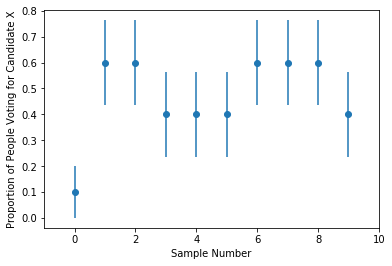

In [6]:
# Setting up the plot
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, standard_errors, fmt="o")

ax.set_xlim(-1, len(samples))

ax.set_xlabel("Sample Number")
ax.set_ylabel("Proportion of People Voting for Candidate X")

plt.show()